In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [21]:
file_path = "NHANES_SES_HealthIndicator_Raw.csv"  # Update path in Colab
df = pd.read_csv(file_path)

In [23]:
display(df.head())

,SEQN,RIDAGEYR,RIAGENDR,DMDEDUC2,INDFMPIR,HOD051,IND310,BMXBMI,BMXWAIST,BPXOSY1,BPXODI1,LBXTC,LBXGLU,LBXHSCRP,LBXGH,LBXFER,LBDRFOSI
0,130378.0,43.0,1.0,5.0,5.00,10.0,1.0,27.0,98.3,135.0,98.0,264.0,113.0,1.78,5.6,38.0,698.0
1,130379.0,66.0,1.0,5.0,5.00,9.0,1.0,33.5,114.7,121.0,84.0,214.0,99.0,2.03,5.6,38.0,933.0
2,130380.0,44.0,2.0,3.0,1.41,6.0,1.0,29.7,93.5,111.0,79.0,187.0,156.0,5.62,6.2,13.3,830.0
3,130381.0,5.0,2.0,4.0,1.53,4.0,1.0,23.8,70.4,117.0,72.0,178.0,100.0,1.45,5.5,38.0,1050.0
4,130382.0,2.0,1.0,4.0,3.60,8.0,1.0,26.4,92.7,117.0,72.0,178.0,100.0,1.45,5.5,24.4,1050.0


In [22]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      11933 non-null  float64
 1   RIDAGEYR  11933 non-null  float64
 2   RIAGENDR  11933 non-null  float64
 3   DMDEDUC2  11933 non-null  float64
 4   INDFMPIR  11933 non-null  float64
 5   HOD051    11933 non-null  float64
 6   IND310    11933 non-null  float64
 7   BMXBMI    11933 non-null  float64
 8   BMXWAIST  11933 non-null  float64
 9   BPXOSY1   11933 non-null  float64
 10  BPXODI1   11933 non-null  float64
 11  LBXTC     11933 non-null  float64
 12  LBXGLU    11933 non-null  float64
 13  LBXHSCRP  11933 non-null  float64
 14  LBXGH     11933 non-null  float64
 15  LBXFER    11933 non-null  float64
 16  LBDRFOSI  11933 non-null  float64
dtypes: float64(17)
memory usage: 1.5 MB


None

In [24]:
print(df.columns)

Index(['SEQN', 'RIDAGEYR', 'RIAGENDR', 'DMDEDUC2', 'INDFMPIR', 'HOD051',
       'IND310', 'BMXBMI', 'BMXWAIST', 'BPXOSY1', 'BPXODI1', 'LBXTC', 'LBXGLU',
       'LBXHSCRP', 'LBXGH', 'LBXFER', 'LBDRFOSI'],
      dtype='object')


In [25]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_scaled)

In [27]:
silhouette_avg = silhouette_score(df_scaled, kmeans_labels)
print(f"Silhouette Score (K-Means): {silhouette_avg:.4f}")

Silhouette Score (K-Means): 0.1606


In [28]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

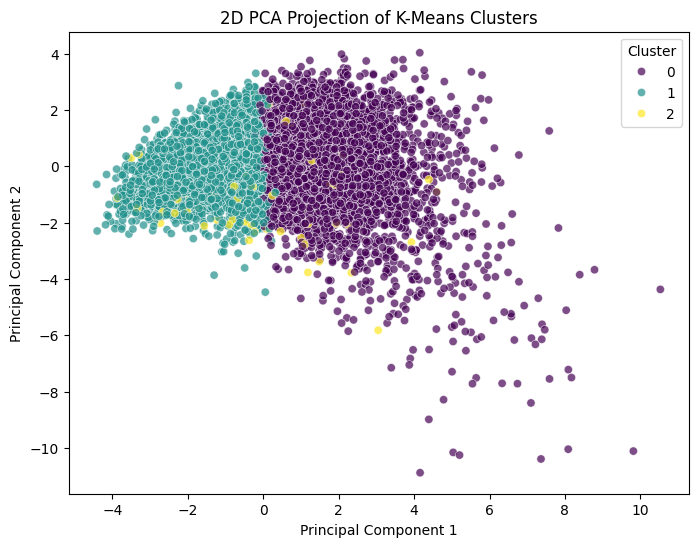

In [29]:
# Scatter plot of PCA with cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=kmeans_labels, palette="viridis", alpha=0.7)
plt.title("2D PCA Projection of K-Means Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


In [30]:
print(f"Explained Variance Ratio (PCA): {pca.explained_variance_ratio_}")

Explained Variance Ratio (PCA): [0.17996982 0.0913039 ]


In [31]:
median_values = df.median()
print("\nMedian Values of Dataset:")
print(median_values)


Median Values of Dataset:
SEQN        136344.00
RIDAGEYR        37.00
RIAGENDR         2.00
DMDEDUC2         4.00
INDFMPIR         2.50
HOD051           5.00
IND310           1.00
BMXBMI          26.40
BMXWAIST        92.70
BPXOSY1        117.00
BPXODI1         72.00
LBXTC          178.00
LBXGLU         100.00
LBXHSCRP         1.45
LBXGH            5.50
LBXFER          38.00
LBDRFOSI      1050.00
dtype: float64


In [32]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

In [33]:
print(df.shape)

(11933, 17)


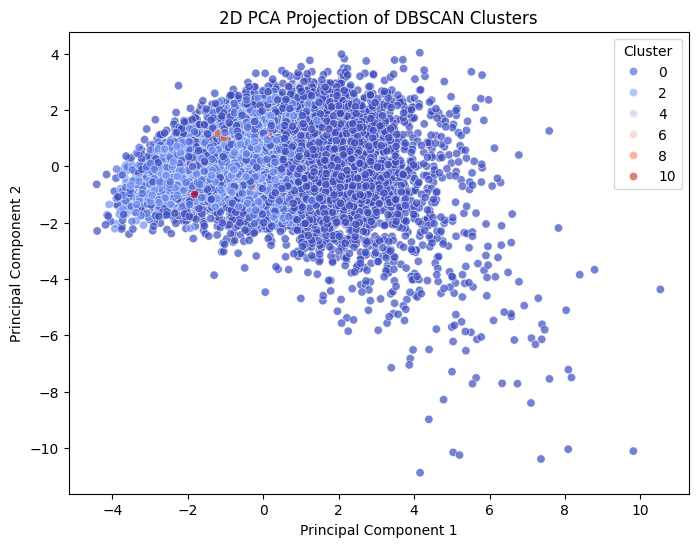

In [34]:
# DBSCAN Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=dbscan_labels, palette="coolwarm", alpha=0.7)
plt.title("2D PCA Projection of DBSCAN Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

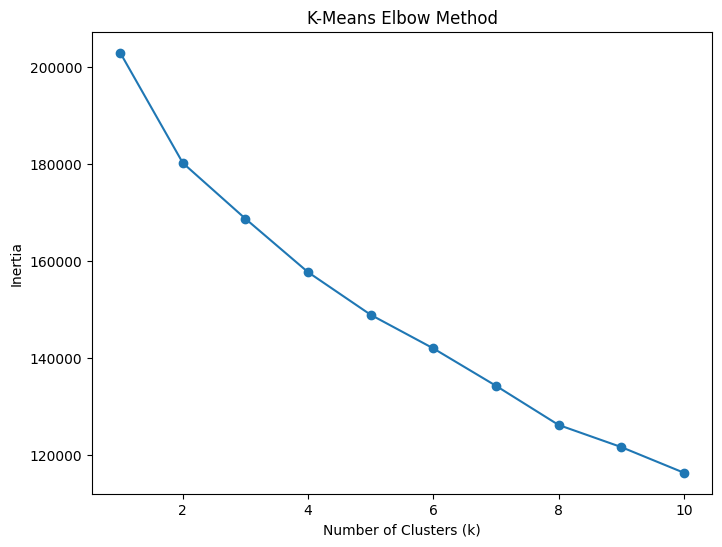

In [35]:
# K-Means Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('K-Means Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()
